In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Exercise2(multivariable).ipynb'   Machine_Learning.ipynb
 Gradient_Descent.ipynb		   save_model.ipynb
 homeprices.csv			   Untitled0.ipynb
 linear_multiple_variables.ipynb


In [ ]:
df  =pd.read_csv("homeprices.csv")

In [ ]:
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


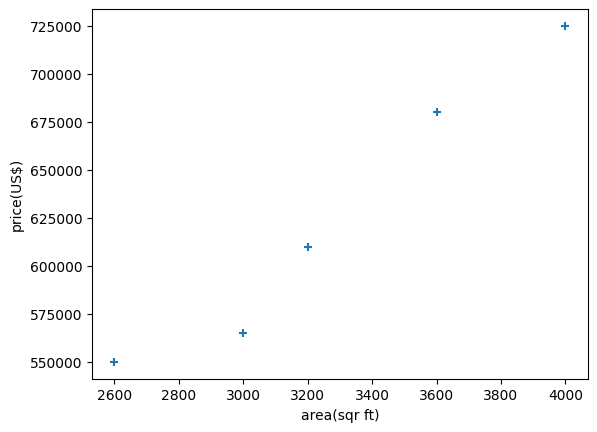

In [ ]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,marker='+')

In [ ]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:

price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

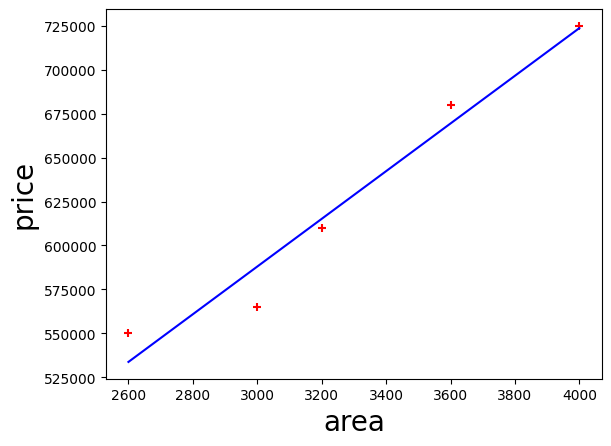

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color = 'red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
135.78767123*5000+180616.43835616432

859554.7945061643

In [ ]:
area_df = pd.read_csv("areas.csv")
area_df.head(2)

,area
0,1000
1,1500


In [ ]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  649083.90410959,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3450,6.490839e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("prediction.csv")

In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

### Save Model To a File Using Python Pickle

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(reg,f)

In [ ]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [ ]:
mp.coef_

array([135.78767123])

In [ ]:
mp.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

## **Save Trained Model Using joblib**

In [ ]:
from sklearn.externals import joblib

ImportError: ignored

In [ ]:
import joblib

In [ ]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [ ]:
mj = joblib.load('model_joblib')

In [ ]:
mj.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])